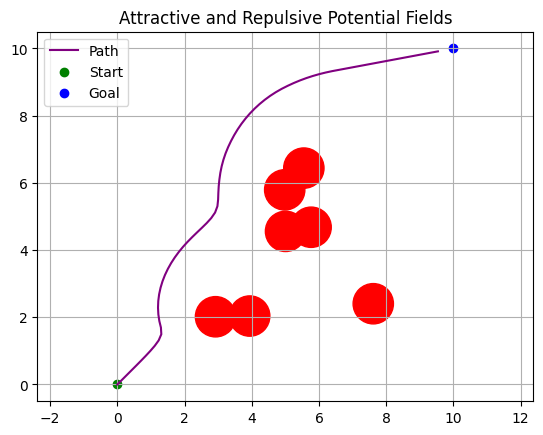

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def potential_field_planner(start, goal, obstacles, eta=100, zeta=1, step_size=0.2, max_iters=1000):
    pos = np.array(start, dtype=np.float32)
    goal = np.array(goal, dtype=np.float32)
    path = [pos.copy()]

    for _ in range(max_iters):
        # Attractive force
        F_att = -zeta * (pos - goal)

        # Repulsive force
        F_rep = np.zeros(2)
        for obs in obstacles:
            d = np.linalg.norm(pos - obs)
            if d < 3.0:  # only repulse if within influence radius
                F_rep += eta * (1.0 / d - 1.0 / 3.0) * (pos - obs) / (d**3)

        # Total force
        F = F_att + F_rep
        pos += step_size * F / np.linalg.norm(F + 1e-6)  # normalize to avoid overshooting
        path.append(pos.copy())

        if np.linalg.norm(pos - goal) < 0.5:
            break

    return np.array(path)

# Parameters
start = np.array([0, 0])
goal = np.array([10, 10])
obstacles = [np.random.uniform(2, 8, 2) for _ in range(7)]

# Simulation
path = potential_field_planner(start, goal, obstacles)

# Plot
plt.figure()
plt.plot(path[:, 0], path[:, 1], label="Path", color='purple')
for obs in obstacles:
    circle = plt.Circle(obs, 0.6, color='red')
    plt.gca().add_patch(circle)
plt.scatter(*start, c='green', label='Start')
plt.scatter(*goal, c='blue', label='Goal')
plt.title("Attractive and Repulsive Potential Fields")
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()


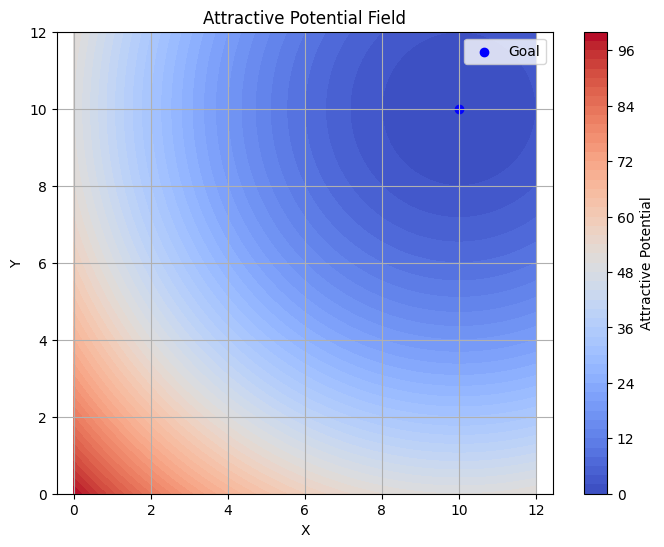

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
zeta = 1
goal = np.array([10, 10])

# Grid
x = np.linspace(0, 12, 100)
y = np.linspace(0, 12, 100)
X, Y = np.meshgrid(x, y)
U_att = 0.5 * zeta * ((X - goal[0])**2 + (Y - goal[1])**2)

# Plot attractive potential
plt.figure(figsize=(8, 6))
plt.contourf(X, Y, U_att, levels=50, cmap='coolwarm')
plt.colorbar(label='Attractive Potential')
plt.scatter(*goal, color='blue', label='Goal')
plt.title("Attractive Potential Field")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()


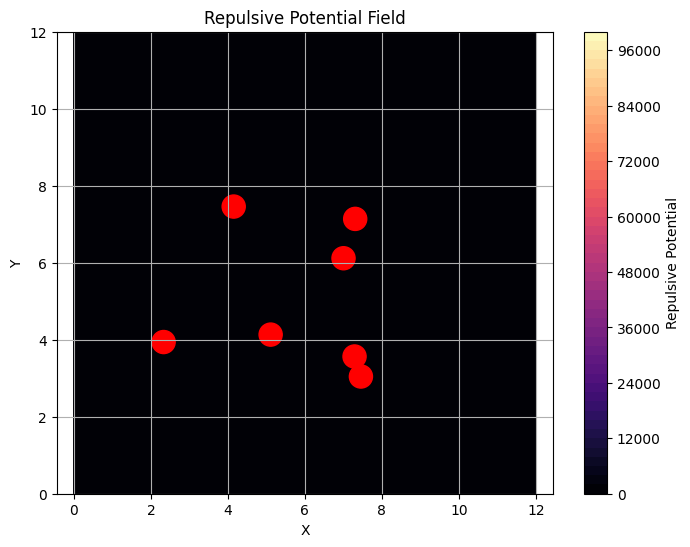

In [7]:
# Parameters
eta = 100
influence_radius = 3.0
obstacles = [np.random.uniform(2, 8, 2) for _ in range(7)]

# Repulsive potential
U_rep = np.zeros_like(X)

for obs in obstacles:
    dist = np.sqrt((X - obs[0])**2 + (Y - obs[1])**2)
    influence_zone = dist < influence_radius
    with np.errstate(divide='ignore'):
        U_rep[influence_zone] += 0.5 * eta * (1.0/dist[influence_zone] - 1.0/influence_radius)**2

# Plot repulsive potential
plt.figure(figsize=(8, 6))
plt.contourf(X, Y, U_rep, levels=50, cmap='magma')
plt.colorbar(label='Repulsive Potential')
for obs in obstacles:
    circle = plt.Circle(obs, 0.3, color='red')
    plt.gca().add_patch(circle)
plt.title("Repulsive Potential Field")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.axis('equal')
plt.show()
